In [1]:
import plotly.express as px
import numpy as np
import pandas as pd
import os

# Area graph (stacked)

Tras valorar distintas opciones, se toma como ejemplo para este apartado el conjunto de datos de kaggle [property-sales](https://www.kaggle.com/datasets/htagholdings/property-sales). En este se recogen datos sobre ventas de viviendas como la fecha de venta, código postal, precio o el número de habitaciones.



In [2]:
os.listdir("/kaggle/input/")

['netflix2020',
 'income-classification',
 'supply-chain-analysis',
 'property-sales',
 'product-sales-detail',
 'disney-movies-and-tv-shows',
 'wind-turbine-scada-dataset']

In [3]:
df_properties = pd.read_csv("/kaggle/input/property-sales/raw_sales.csv")
df_properties.head()

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3


Se realizan algunas transformaciones en los datos para que estos estén en el formato y estructura adecuada para poder graficarlos. 

In [4]:
df_properties["datesold_month"]=pd.to_datetime(df_properties["datesold"]).dt.strftime("%Y %m")

In [5]:
df_plot1 = df_properties[["datesold_month","bedrooms", "price"]].groupby(["datesold_month","bedrooms"]).sum()
df_plot1 = df_plot1.reset_index()

En ocasiones, es difícil identificar tendencias mediante gráficas de áreas apiladas, ya que hace falta restarle los valores de otras categorías.

In [6]:
px.area(df_plot1, x="datesold_month", y="price", color = "bedrooms", template = "plotly_white", title="Evolución de valor de mercado inmobiliario <br><sub>Gráfica de áreas agrupada</sub>")

In [7]:
px.line(df_plot1, x="datesold_month", y="price", color = "bedrooms", template = "plotly_white")

# Nightingale rose chart

https://plotly.com/python/wind-rose-charts/

https://datavizcatalogue.com/methods/nightingale_rose_chart.html

In [2]:
os.listdir("/kaggle/input/wind-turbine-scada-dataset")

['T1.csv']

In [3]:
df_wind = pd.read_csv("/kaggle/input/wind-turbine-scada-dataset/T1.csv")
df_wind.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [4]:
df_wind["Date/Time"] = pd.to_datetime(df_wind["Date/Time"])

In [5]:
df_wind = df_wind[df_wind["Date/Time"].dt.strftime("%m")=="01"]

In [6]:
df_wind.columns = ["dateTime", "activePower", "windSpeed", "theoricalPower", "windDirection"]

In [7]:
df_wind_plot =  df_wind[["dateTime"]].groupby(df_wind["windDirection"].round(-1)).count().reset_index()
df_wind_plot.columns = ["windDirection", "frequency"]

In [15]:
px.bar_polar(df_wind_plot, r="frequency", theta="windDirection", title="Orientación y frecuencia del viento <br><br><sub>Gráfica Nightingale</sub>", template = "plotly_white")

# Beeswarm plot

In [9]:
import seaborn as sns

In [10]:
# https://seaborn.pydata.org/generated/seaborn.swarmplot.html
os.listdir("/kaggle/input/supply-chain-analysis")


['supply_chain_data.csv']

In [11]:
df_supply_chain = pd.read_csv("/kaggle/input/supply-chain-analysis/supply_chain_data.csv")
df_supply_chain.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


[Text(0.5, 1.0, 'Precios de los productos de skincare (Beeswarm plot)')]

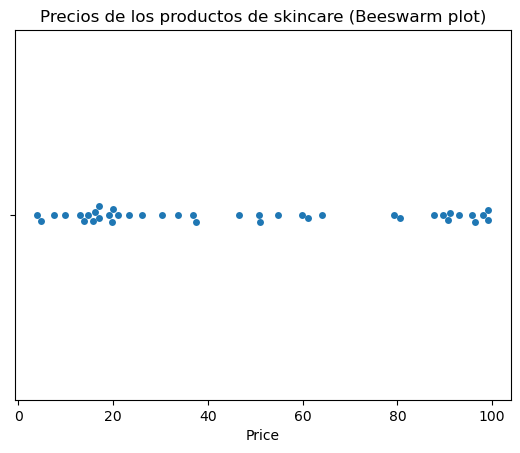

In [14]:
sns.swarmplot(data = df_supply_chain[df_supply_chain["Product type"] =="skincare"], x="Price",).set( title="Precios de los productos de skincare (Beeswarm plot)" )